# LOAN STATUS PREDICTION

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report

In [4]:
df = pd.read_csv("loan.csv")

In [175]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Data Preprocessing

In [176]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [178]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

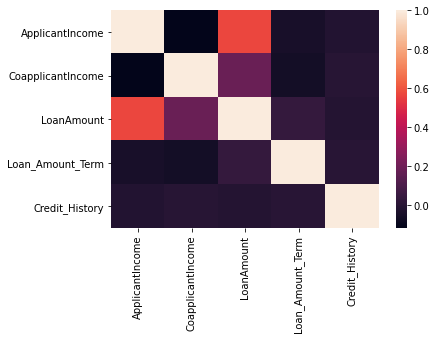

In [180]:
#Heatmap
sns.heatmap(df.corr())

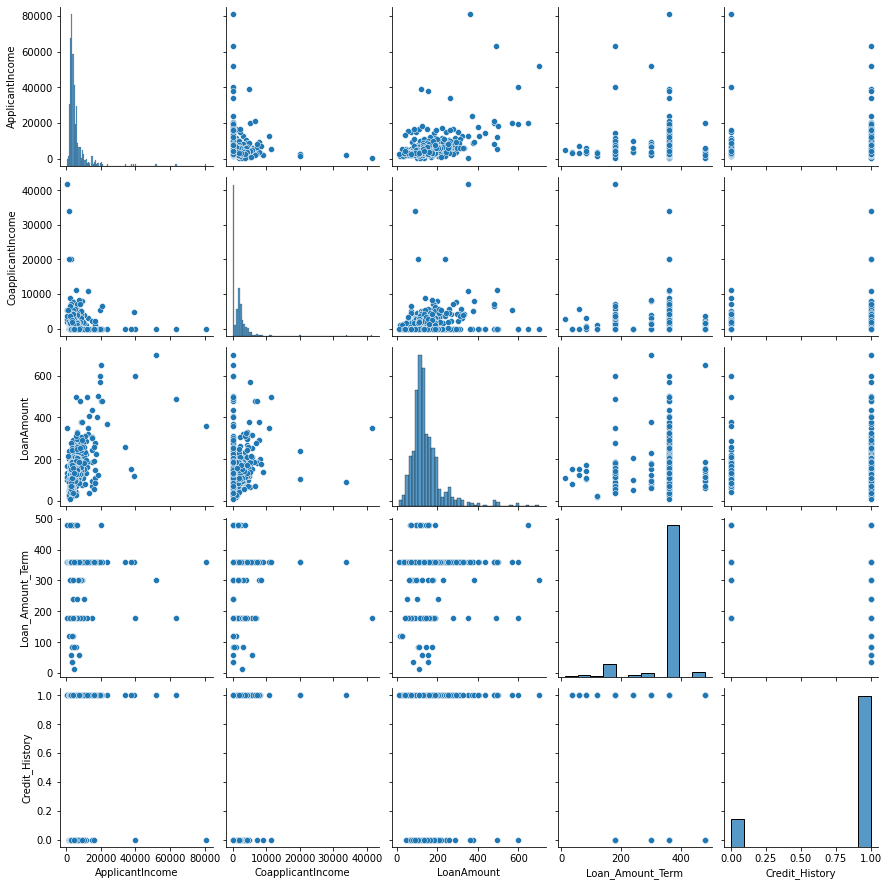

In [181]:
#Pairplot
sns.pairplot(df)

In [182]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


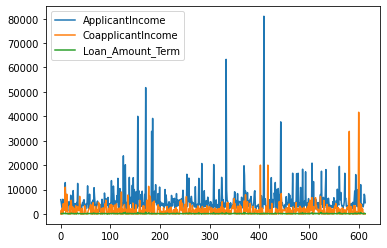

In [183]:
#histogram
plt.plot(df.ApplicantIncome,label='ApplicantIncome')
plt.plot(df.CoapplicantIncome,label='CoapplicantIncome')
plt.plot(df.LoanAmount,label='Loan_Amount_Term')
plt.legend()

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


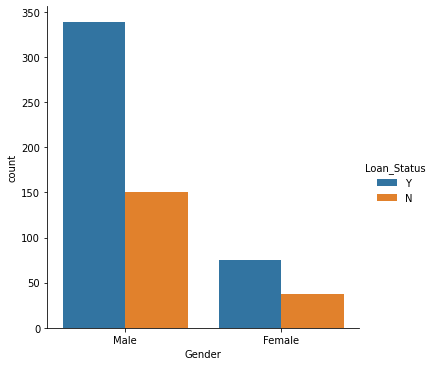

In [184]:
#Loan Prediction on different factors
sns.factorplot('Gender',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


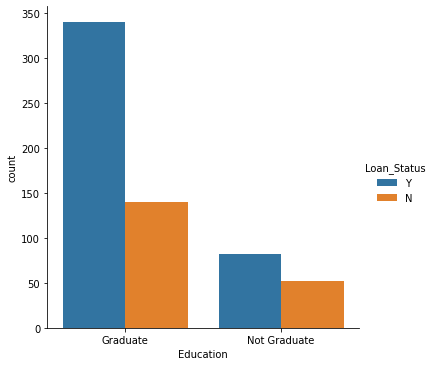

In [185]:
sns.factorplot('Education',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


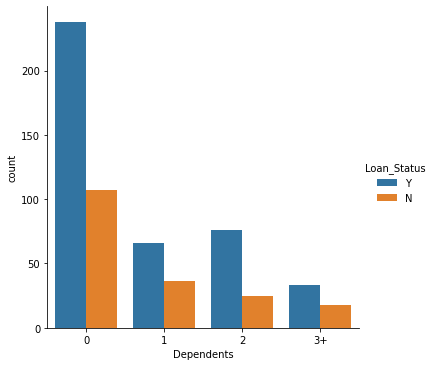

In [186]:
sns.factorplot('Dependents',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


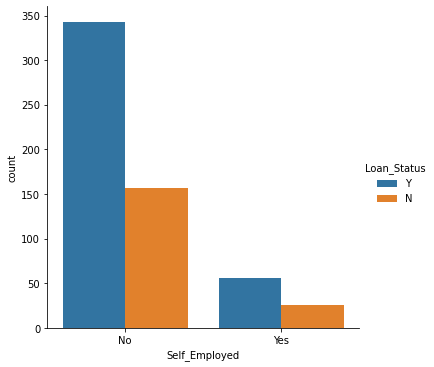

In [187]:
sns.factorplot('Self_Employed',kind='count',data=df,hue='Loan_Status')

D:\anaconda3\envs\python version38\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\anaconda3\envs\python version38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


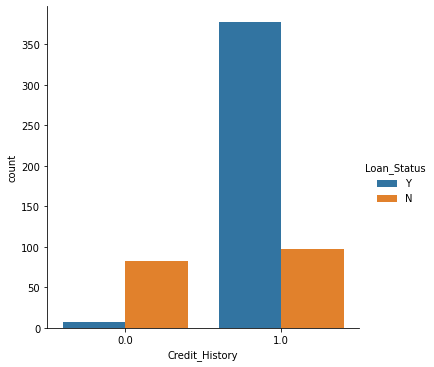

In [188]:
sns.factorplot('Credit_History',kind='count',data=df,hue='Loan_Status')

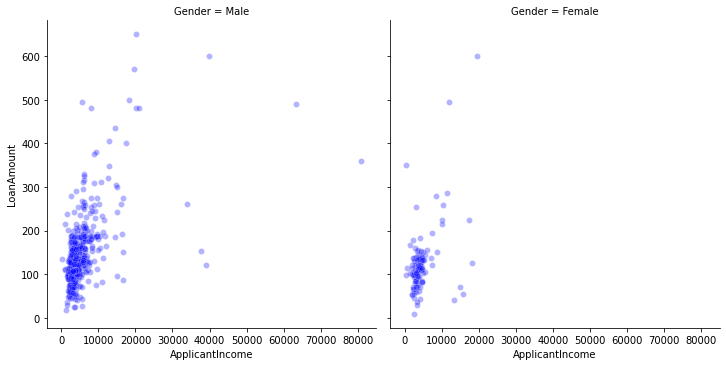

In [189]:
sns.relplot(x="ApplicantIncome", y="LoanAmount", data=df, col="Gender",color="Blue",alpha=0.3)
plt.show()

In [190]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [191]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## DATA CLEANING

In [192]:
df.Education[df.Education=='Graduate']=1
df.Education[df.Education=='Not Graduate']=0

df.Gender[df.Gender=='Male']=1
df.Gender[df.Gender=='Female']=0

<ipython-input-192-e94544a93fe3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Education[df.Education=='Graduate']=1
<ipython-input-192-e94544a93fe3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Education[df.Education=='Not Graduate']=0
<ipython-input-192-e94544a93fe3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender=='Male']=1
<ipython-input-192-e94544a93fe3>:5: SettingWithCopyWarning: 
A value is tryi

In [193]:
df.drop('Loan_ID',axis=1,inplace=True)

In [194]:
df.Self_Employed[df.Self_Employed=='Yes']=1
df.Self_Employed[df.Self_Employed=='No']=1

<ipython-input-194-776b94c7b1b7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Self_Employed[df.Self_Employed=='Yes']=1
<ipython-input-194-776b94c7b1b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Self_Employed[df.Self_Employed=='No']=1


In [195]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,No,0,1,1,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,Yes,1,1,1,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1,Yes,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1,Yes,0,0,1,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1,No,0,1,1,6000,0.0,141.0,360.0,1.0,Urban,Y


## Filling Null Values

In [196]:
df['Gender']=df['Gender'].fillna(0)
df['Married']=df['Married'].fillna(1)
df['Dependents']=df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna(0)
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(1)

In [197]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## LABEL ENCODING

In [198]:

le = LabelEncoder()
df['Married']=le.fit_transform(df['Married'].astype(str))
df['Property_Area']=le.fit_transform(df['Property_Area'].astype(str))
df['Dependents']=le.fit_transform(df['Dependents'].astype(str))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,1,1,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,2,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,N
2,1,2,0,1,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,1,2,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,Y
4,1,1,0,1,1,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,1,1,2900,0.0,71.000000,360.0,1.0,0,Y
610,1,2,3,1,1,4106,0.0,40.000000,180.0,1.0,0,Y
611,1,2,1,1,1,8072,240.0,253.000000,360.0,1.0,2,Y
612,1,2,2,1,1,7583,0.0,187.000000,360.0,1.0,2,Y


## Splitting Data Into Testing And Training

In [199]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=1)

## Model Fitting

In [200]:
model = RandomForestClassifier()

In [201]:
model.fit(Xtrain,ytrain)

RandomForestClassifier()

In [202]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [203]:
pred = model.predict(Xtest)

In [204]:
from sklearn.metrics import confusion_matrix

In [205]:
cf = confusion_matrix(ytest,pred)
cf

array([[ 26,  35],
       [  9, 115]], dtype=int64)

In [206]:
model.base_estimator_

DecisionTreeClassifier()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

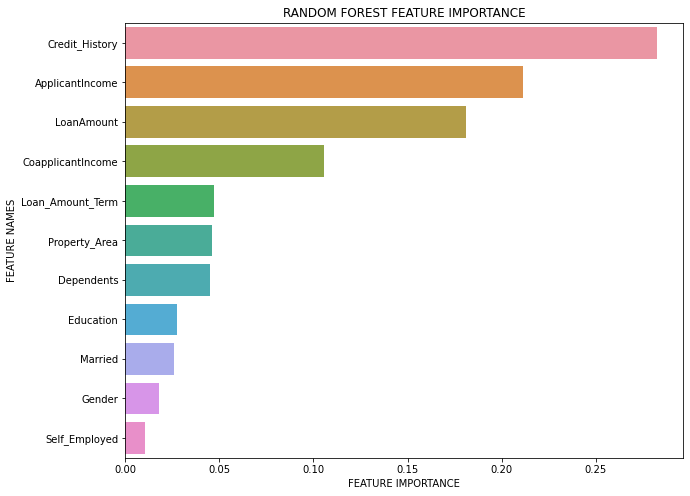

In [207]:
plot_feature_importance(model.feature_importances_, X.columns, 'RANDOM FOREST')

## CHECKING ACCURACY

In [208]:
result = model.score(Xtest, ytest)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 76.216%


In [209]:
print("Classification Report for Random Forest Classifier")
print(classification_report(ytest, pred))

Classification Report for Random Forest Classifier
              precision    recall  f1-score   support

           N       0.74      0.43      0.54        61
           Y       0.77      0.93      0.84       124

    accuracy                           0.76       185
   macro avg       0.75      0.68      0.69       185
weighted avg       0.76      0.76      0.74       185

